In [46]:
import aplpy
import os
import pandas as pd
import numpy as np
import  matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

path = os.getcwd()

Se grafican para cada galaxia:
    
    1 - Imagen del HST con posiciones Cefeidas SH0ES y propias
    2 - Imagen de PMAS con posiciones Cefeidas, descartadas y utilizadas
    3 - Imagen de PMAS con metalicidades: escala de color para representar el valor medido y escala de tamaño para el error

### NGC 3021

INFO: Auto-setting vmin to -7.811e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.196e-01 [aplpy.core]


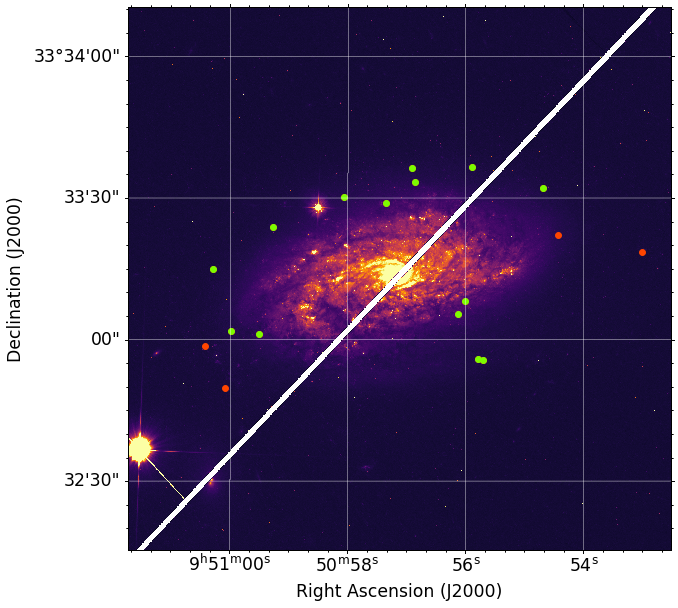

In [4]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\NGC3021')    
os.getcwd()

gc = aplpy.FITSFigure('ic1376010_drz.fits', north=True, figsize=(10,10))

gc.show_colorscale(cmap='inferno')
gc.add_grid()
gc.grid.set_alpha(0.5)
gc.ticks.set_minor_frequency(6)


# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')
gc.axis_labels.set_font(size='xx-large')
gc.tick_labels.set_font(size='xx-large')


## Leer y dibujar posiciones cefeidas
datos = pd.read_table(path+'\\riess2016.txt', delim_whitespace=False, sep=',')
ra = datos['RA'][datos['GALAXY']=='N3021']   
dec = datos['DEC'][datos['GALAXY']=='N3021']
gc.show_markers(ra, dec, edgecolor='orangered', facecolor='orangered',marker='o', s=35, alpha=1)

ra, dec = np.loadtxt('cefeidas3021.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='lawngreen',marker='o', s=35, alpha=1)

# Zoom
gc.recenter(147.738,33.5536, width=0.032, height=0.032)

# Guardar imagen
#gc.save('cefeidas3021.png')

INFO: Auto-setting vmin to -2.015e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.797e+00 [aplpy.core]


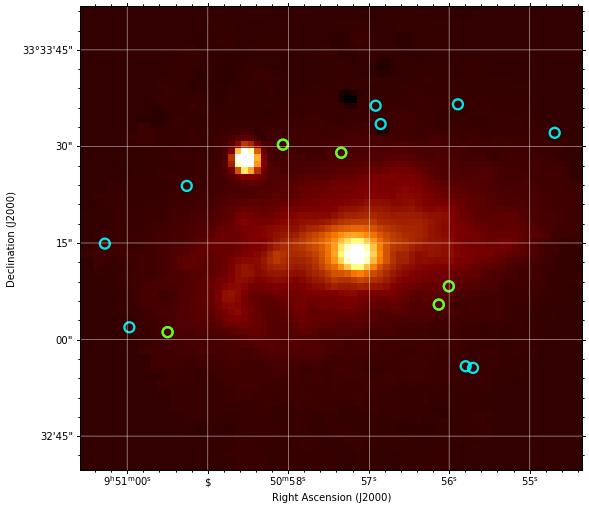

In [95]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\NGC3021')    
os.getcwd()

gc = aplpy.FITSFigure('NGC3021.V500.rscube.fits',slices=[1407],figsize=(9,9))# la capa 1407 se corresponde con el Halfa

# Editar view general
gc.show_colorscale(cmap='afmhot')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)

# Contorno
from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization import simple_norm
hdul = fits.open('NGC3021.V500.rscube.fits')
img = hdul[0].data
data = img[1300,:,:]
#gc.show_contour(data, colors='magenta', levels =17,alpha=0.2)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')

## Leer y dibujar posiciones cefeidas y centro
ra, dec = np.loadtxt('cefeidas3021.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='cyan', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)

ra_gal = np.amin(ra)+(np.amax(ra)-np.amin(ra))/2 - 0.00135
dec_gal = np.amin(dec)+(np.amax(dec)-np.amin(dec))/2 - 0.0008
#gc.show_markers(ra_gal,dec_gal, edgecolor='magenta', facecolor='none',marker='o', s=80, alpha=1, linewidth=2)


## Posiciones finales
ra = np.delete(ra, (1,2,3,6,7,8,10,11,13)) 
dec = np.delete(dec, (1,2,3,6,7,8,10,11,13)) 

pos_final = np.array((ra,dec)).T
#np.savetxt('cefeidas3021_final.txt', pos_final)

gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)


INFO: Auto-setting vmin to -2.015e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.797e+00 [aplpy.core]
[91.60228408856653, 30.776812189547144, 67.3842778726242, 35.472789198777285, 26.946554866018822]


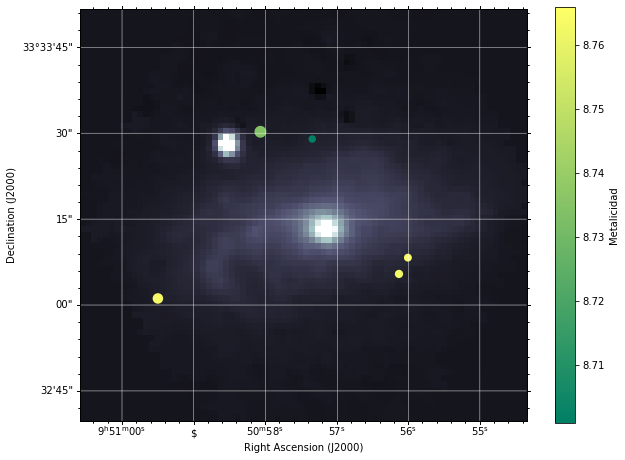

In [27]:
os.chdir(path+'\\NGC3021')    
os.getcwd()

f = plt.figure(figsize=(10,10)) #figsize=(9,9),

gc = aplpy.FITSFigure('NGC3021.V500.rscube.fits',slices=[1407], figure=f)
gc.show_colorscale(cmap='bone')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')


## Posiciones representando metalicidad (por tamaño y color) 
ra3021, dec3021 = np.loadtxt(path+'\\NGC3021\cefeidas3021_final.txt', unpack=True)
met3021 = np.loadtxt(path+'\\NGC3021\met_3021.txt', unpack=True)
errmet3021 = np.loadtxt(path+'\\NGC3021\err_met_3021.txt', unpack=True)


c = [(10**n/1e6-1.1**n-450) for n in met3021]
s = [2e3*n for n in errmet3021]
print(s)
                                               
gc.show_markers(ra3021,dec3021, cmap = plt.get_cmap('summer'), 
                norm = colors.PowerNorm(gamma=0.4),
                c=c, s=s,facecolor='none', marker='o', linewidths=2.3)
f.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=met3021.min(), vmax=met3021.max()),
            cmap=plt.get_cmap('summer')), shrink =0.765, format='%.2f',
            label="Metalicidad")


### NGC 3972

INFO: Auto-setting vmin to -3.303e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.828e-01 [aplpy.core]


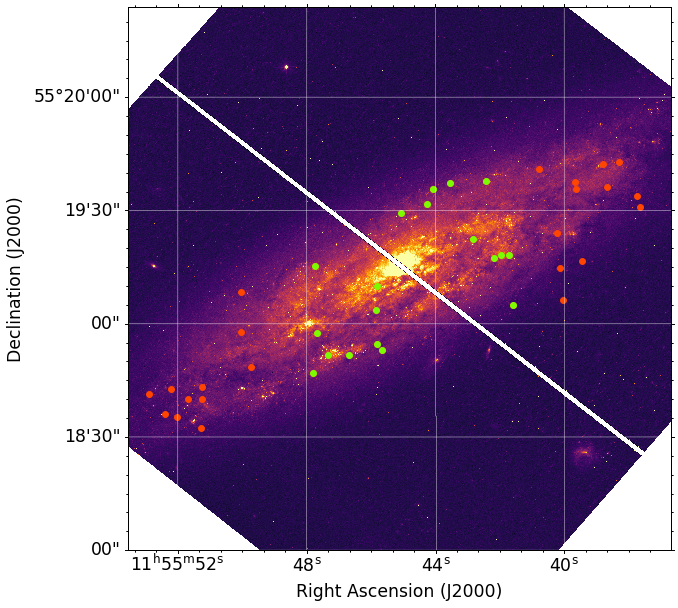

In [6]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\NGC3972')    
os.getcwd()

gc = aplpy.FITSFigure('icjf12020_drz.fits', north=True, figsize=(10,10))
gc.show_colorscale(cmap='inferno')
gc.add_grid()
gc.grid.set_alpha(0.5)
gc.ticks.set_minor_frequency(6)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')
gc.axis_labels.set_font(size='xx-large')
gc.tick_labels.set_font(size='xx-large')

## Leer y dibujar posiciones cefeidas
datos = pd.read_table(path+'\\riess2016.txt', delim_whitespace=False, sep=',')
ra = datos['RA'][datos['GALAXY']=='N3972']   
dec = datos['DEC'][datos['GALAXY']=='N3972']
gc.show_markers(ra, dec, edgecolor='orangered', facecolor='orangered',marker='o', s=35, alpha=1)

ra, dec = np.loadtxt('cefeidas3972.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='lawngreen',marker='o', s=35, alpha=1)

# Zoom
gc.recenter(178.938,55.32, width=0.04, height=0.04)

## Guardar imagen
#gc.save('cefeidas3972.png')

INFO: Auto-setting vmin to -5.031e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.850e-01 [aplpy.core]


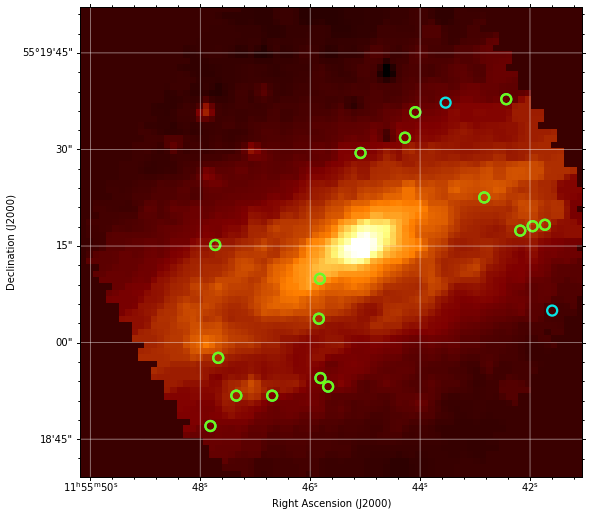

In [96]:
## Abrir y mostrar archivo fits
os.chdir(path+'\\NGC3972')    
os.getcwd()

gc = aplpy.FITSFigure('NGC3972.V500.rscube.fits',slices=[1300],figsize=(9,9))

# Editar view general
gc.show_colorscale(cmap='afmhot')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)

# Contorno
from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization import simple_norm
hdul = fits.open('NGC3972.V500.rscube.fits')
img = hdul[0].data
data = img[1300,:,:]
#gc.show_contour(data, colors='magenta', levels =17,alpha=0.2)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')

## Leer y dibujar posiciones cefeidas
ra, dec = np.loadtxt('cefeidas3972.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='cyan', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)

ra_gal = np.amin(ra)+(np.amax(ra)-np.amin(ra))/2 +0.0016
dec_gal = np.amin(dec)+(np.amax(dec)-np.amin(dec))/2 +0.0007
#gc.show_markers(ra_gal,dec_gal, edgecolor='magenta', facecolor='none',marker='o', s=80, alpha=1, linewidth=2)


## Posiciones finales
ra = np.delete(ra,(11, 18))
dec = np.delete(dec, (11, 18))

pos_final = np.array((ra,dec)).T
np.savetxt('cefeidas3972_final.txt', pos_final)

gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)


INFO: Auto-setting vmin to -5.266e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.055e-01 [aplpy.core]


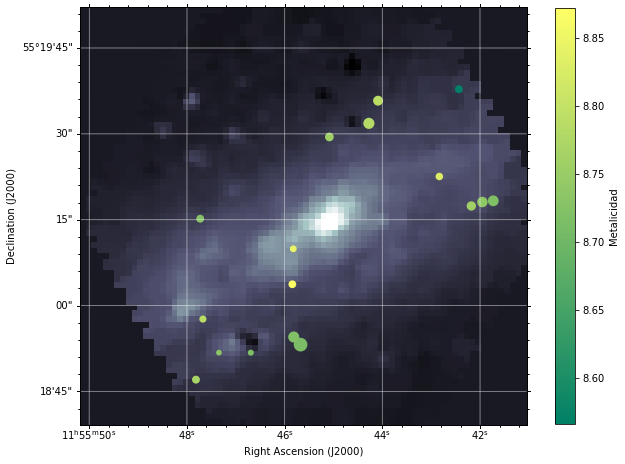

In [28]:
os.chdir(path+'\\NGC3972')    
os.getcwd()

f = plt.figure(figsize=(10,10)) 

gc = aplpy.FITSFigure('NGC3972.V500.rscube.fits',slices=[1407], figure=f)
gc.show_colorscale(cmap='bone')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')


## Posiciones representando metalicidad (por tamaño y color) 
ra3972, dec3972 = np.loadtxt(path+'\\NGC3972\cefeidas3972_final.txt', unpack=True)
errmet3972 = np.loadtxt(path+'\\NGC3972\err_met_3972.txt', unpack=True)
met3972 = np.loadtxt(path+'\\NGC3972\met_3972.txt', unpack=True)

c = [(10**n/1e6-1.1**n-350) for n in met3972]
s = [2e3*n for n in errmet3972]

gc.show_markers(ra3972,dec3972, cmap = plt.get_cmap('summer'), 
                norm = colors.PowerNorm(gamma=0.4),
                c=c, s=s,facecolor='none', marker='o', linewidths=2.3)
f.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=met3972.min(), vmax=met3972.max()),
            cmap=plt.get_cmap('summer')), shrink =0.765, format='%.2f',
            label="Metalicidad")
#17

### NGC 3982

INFO: Auto-setting vmin to -7.400e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.888e-01 [aplpy.core]


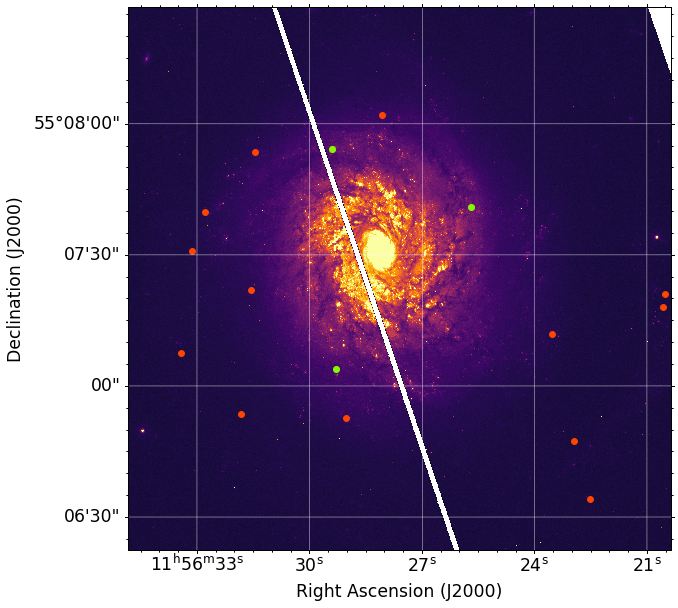

In [8]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\NGC3982')    
os.getcwd()

gc = aplpy.FITSFigure('ib1f22040_drz.fits', north=True, figsize=(10,10))
gc.show_colorscale(cmap='inferno')
gc.add_grid()
gc.grid.set_alpha(0.5)
gc.ticks.set_minor_frequency(6)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')
gc.axis_labels.set_font(size='xx-large')
gc.tick_labels.set_font(size='xx-large')


## Leer y dibujar posiciones cefeidas
datos = pd.read_table(path+'\\riess2016.txt', delim_whitespace=False, sep=',')
ra = datos['RA'][datos['GALAXY']=='N3982']   
dec = datos['DEC'][datos['GALAXY']=='N3982']
gc.show_markers(ra, dec, edgecolor='orangered', facecolor='orangered',marker='o', s=35, alpha=1)

ra, dec = np.loadtxt('cefeidas3982.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='lawngreen',marker='o', s=35, alpha=1)

# Zoom
gc.recenter(179.115,55.1235, width=0.03455, height=0.03455)

## Guardar imagen
#gc.save('cefeidas3982.png')

invalid keyvalue. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -9.645e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.071e+01 [aplpy.core]


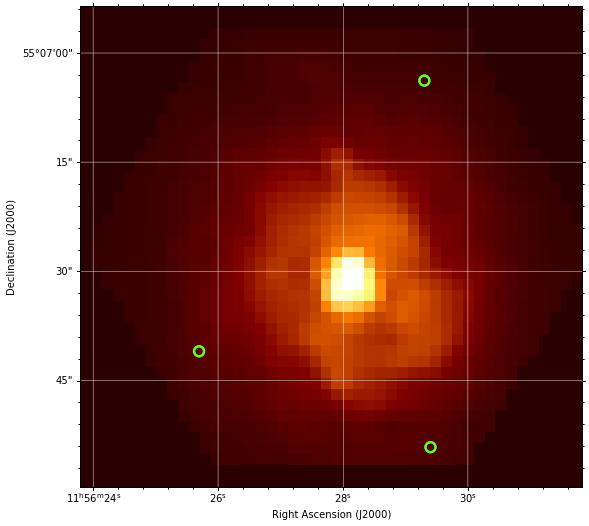

In [42]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\NGC3982')    
os.getcwd()

gc = aplpy.FITSFigure('NGC3982.V500.rscube.fits',slices=[1300],  figsize=(9,9))

# Editar view general
gc.show_colorscale(cmap='afmhot')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)

# Contorno
from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization import simple_norm
hdul = fits.open('NGC3982.V500.rscube.fits')
img = hdul[0].data
data = img[1300,:,:]
#gc.show_contour(data, colors='magenta', levels =17,alpha=0.2)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')

## Leer y dibujar posiciones cefeidas
ra, dec = np.loadtxt('cefeidas3982.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='cyan', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)

ra_gal = np.amin(ra)+(np.amax(ra)-np.amin(ra))/2 + 0.0025
dec_gal = np.amin(dec)+(np.amax(dec)-np.amin(dec))/2 + 0.0006
#gc.show_markers(ra_gal,dec_gal, edgecolor='magenta', facecolor='none',marker='o', s=80, alpha=1, linewidth=2)

## Posiciones finales

gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)


invalid keyvalue. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -9.387e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.042e+01 [aplpy.core]


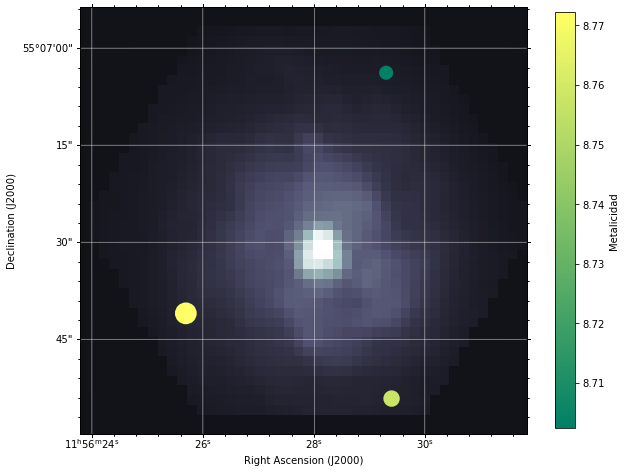

In [31]:
os.chdir(path+'\\NGC3982')    
os.getcwd()

f = plt.figure(figsize=(10,10)) 

gc = aplpy.FITSFigure('NGC3982.V500.rscube.fits',slices=[1407], figure=f)
gc.show_colorscale(cmap='bone')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')


## Posiciones representando metalicidad (por tamaño y color) 
ra3982, dec3982 = np.loadtxt(path+'\\NGC3982\cefeidas3982.txt', unpack=True)
errmet3982 = np.loadtxt(path+'\\NGC3982\err_met_3982.txt', unpack=True)
met3982 = np.loadtxt(path+'\\NGC3982\met_3982.txt', unpack=True)

c = [(10**n/1e6-1.1**n-450) for n in met3982]
s = [2e3*n for n in errmet3982]

gc.show_markers(ra3982,dec3982, cmap = plt.get_cmap('summer'), 
                norm = colors.PowerNorm(gamma=0.4),
                c=c, s=s,facecolor='none', marker='o', linewidths=2.3)
f.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=met3982.min(), vmax=met3982.max()),
            cmap=plt.get_cmap('summer')), shrink =0.765, format='%.2f',
            label="Metalicidad")

### NGC 7250

INFO: Auto-setting vmin to -6.048e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.248e-01 [aplpy.core]


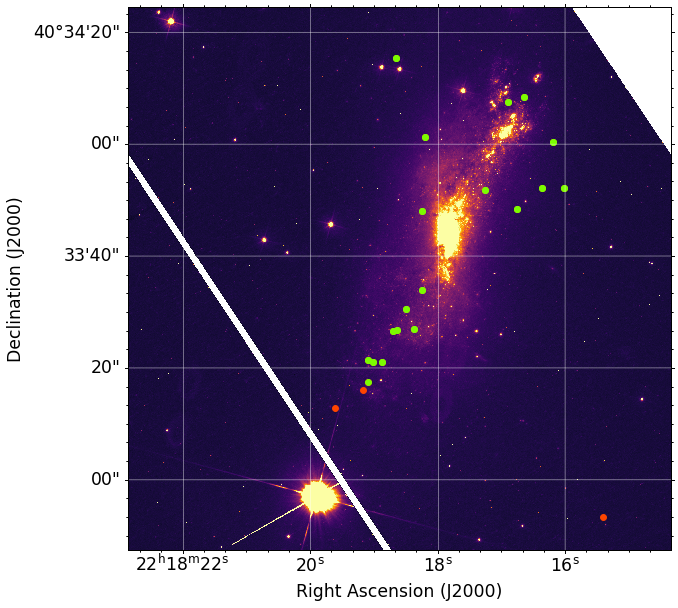

In [10]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\NGC7250')    
os.getcwd()

gc = aplpy.FITSFigure('ic130c020_drz.fits', north=True, figsize=(10,10))
gc.show_colorscale(cmap='inferno')
gc.add_grid()
gc.grid.set_alpha(0.5)
gc.ticks.set_minor_frequency(6)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')
gc.axis_labels.set_font(size='xx-large')
gc.tick_labels.set_font(size='xx-large')

## Leer y dibujar posiciones cefeidas
datos = pd.read_table(path+'\\riess2016.txt', delim_whitespace=False, sep=',')
ra = datos['RA'][datos['GALAXY']=='N7250']   
dec = datos['DEC'][datos['GALAXY']=='N7250']
gc.show_markers(ra, dec, edgecolor='orangered', facecolor='orangered',marker='o', s=35, alpha=1)

ra, dec = np.loadtxt('cefeidas7250.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='lawngreen',marker='o', s=35, alpha=1)

os.chdir(path+'\\NGC7250_new')    
os.getcwd()
ra, dec = np.loadtxt('cefeidas7250_new.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='lawngreen',marker='o', s=35, alpha=1)

# Zoom
gc.recenter(334.5775,40.56, width=0.027, height=0.027)
#gc.recenter(334.5775,40.56, width=0.0226, height=0.027)

## Guardar imagen
#gc.save('cefeidas7250.png')

INFO: Auto-setting vmin to -1.212e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.215e+00 [aplpy.core]


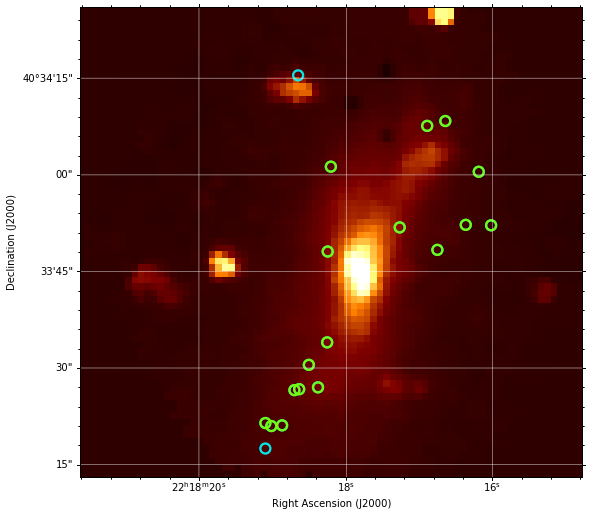

In [97]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\NGC7250')    
os.getcwd()

gc = aplpy.FITSFigure('NGC7250.V500.rscube.fits',slices=[1300],figsize=(9,9))

# Editar view general
gc.show_colorscale(cmap='afmhot')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)

# Contorno
from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization import simple_norm
hdul = fits.open('NGC7250.V500.rscube.fits')
img = hdul[0].data
data = img[1300,:,:]
#gc.show_contour(data, colors='magenta', levels =17,alpha=0.2)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')

## Leer y dibujar posiciones cefeidas
ra, dec = np.loadtxt('cefeidas7250.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='cyan', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)

ra_gal = np.amin(ra)+(np.amax(ra)-np.amin(ra))/2 +0.001
dec_gal = np.amin(dec)+(np.amax(dec)-np.amin(dec))/2 - 0.0005
#gc.show_markers(ra_gal,dec_gal, edgecolor='magenta', facecolor='none',marker='o', s=80, alpha=1, linewidth=2)


## Posiciones finales
ra = np.delete(ra, (4,12))
dec = np.delete(dec, (4,12))

ra0 = np.delete(ra, (2))  
dec0 = np.delete(dec, (2))  
ra0 = np.append(ra0, [ra[2]], axis=0 )
dec0 = np.append(dec0, [dec[2]], axis=0 ) # para colocar la pos 2 al final

pos_final = np.array((ra0,dec0)).T
#np.savetxt('cefeidas7250_final.txt', pos_final)

gc.show_markers(ra0, dec0, edgecolor='lawngreen', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)


INFO: Auto-setting vmin to -1.730e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.188e+00 [aplpy.core]


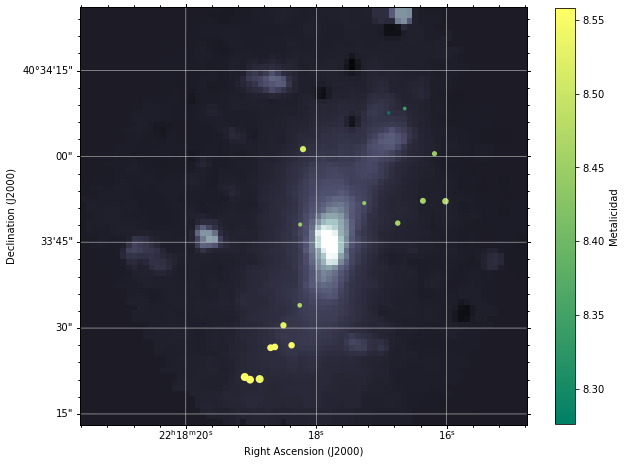

In [32]:
os.chdir(path+'\\NGC7250')    
os.getcwd()

f = plt.figure(figsize=(10,10)) 

gc = aplpy.FITSFigure('NGC7250.V500.rscube.fits',slices=[1407], figure=f)
gc.show_colorscale(cmap='bone')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')


## Posiciones representando metalicidad (por tamaño y color) 
ra7250, dec7250 = np.loadtxt(path+'\\NGC7250\cefeidas7250_final.txt', unpack=True)
met7250 = np.loadtxt(path+'\\NGC7250\met_7250_final.txt', unpack=True)
errmet7250 = np.loadtxt(path+'\\NGC7250\err_met_7250_final.txt', unpack=True)

c = [(10**n/1e6-1.1**n-150) for n in met7250]
s = [2e3*n for n in errmet7250]
                                               
gc.show_markers(ra7250,dec7250, cmap = plt.get_cmap('summer'), 
                norm = colors.PowerNorm(gamma=0.4),
                c=c, s=s,facecolor='none', marker='o', linewidths=2.3)
f.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=met7250.min(), vmax=met7250.max()),
            cmap=plt.get_cmap('summer')), shrink =0.765, format='%.2f',
            label="Metalicidad")

### UGC 9391

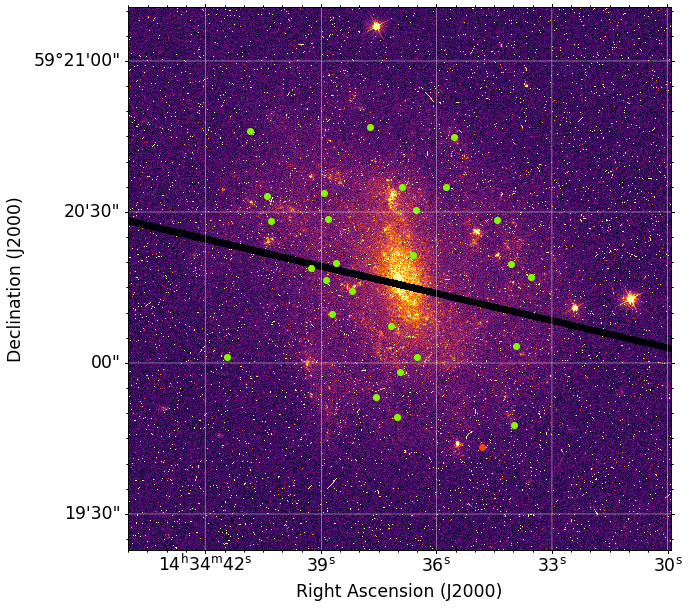

In [45]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\UGC09391')    
os.getcwd()

gc = aplpy.FITSFigure('hst_12880_59_wfc3_uvis_f555w_sci.fits', north=True, figsize=(10,10))
gc.show_colorscale(cmap='inferno', vmin=-1e-3, vmax=1e-01)
gc.add_grid()
gc.grid.set_alpha(0.5)
gc.ticks.set_minor_frequency(6)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')
gc.axis_labels.set_font(size='xx-large')
gc.tick_labels.set_font(size='xx-large')

## Leer y dibujar posiciones cefeidas
datos = pd.read_table(path+'\\riess2016.txt', delim_whitespace=False, sep=',')
ra = datos['RA'][datos['GALAXY']=='U9391']   
dec = datos['DEC'][datos['GALAXY']=='U9391']
gc.show_markers(ra, dec, edgecolor = 'orangered', facecolor='orangered',marker='o', s=35, alpha=1)

ra, dec = np.loadtxt('cefeidasU09391.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='lawngreen',marker='o', s=35, alpha=1)

# Zoom
gc.recenter(218.654,59.338, width=0.03, height=0.03)

## Guardar imagen
#gc.save('cefeidasU09391.png')

INFO: Auto-setting vmin to -1.606e-02 [aplpy.core]
INFO: Auto-setting vmax to  9.401e-02 [aplpy.core]


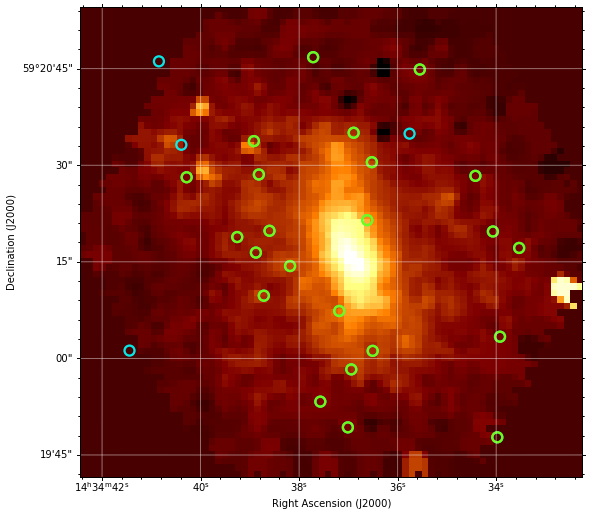

In [100]:
## Abrir y mostrar archivo fits

os.chdir(path+'\\UGC09391')    
os.getcwd()

gc = aplpy.FITSFigure('UGC09391.V500.rscube.fits',slices=[1300],figsize=(9,9))

# Editar view general
gc.show_colorscale(cmap='afmhot')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)

# Contorno
from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization import simple_norm
hdul = fits.open('UGC09391.V500.rscube.fits')
img = hdul[0].data
data = img[1300,:,:]
#gc.show_contour(data, colors='magenta', levels =17,alpha=0.2)

# Cambiar ejes
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')

## Leer y dibujar posiciones cefeidas
ra, dec = np.loadtxt('cefeidasU09391.txt', unpack=True)
gc.show_markers(ra, dec, edgecolor='cyan', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)

ra_gal = np.amin(ra)+(np.amax(ra)-np.amin(ra))/2 -0.0025
dec_gal = np.amin(dec)+(np.amax(dec)-np.amin(dec))/2 - 0.0005
#gc.show_markers(ra_gal,dec_gal, edgecolor='magenta', facecolor='none',marker='o', s=80, alpha=1, linewidth=2)


## Posiciones finales
ra = np.delete(ra,(0,10,11,18))
dec = np.delete(dec, (0,10,11,18))

pos_final = np.array((ra,dec)).T
#np.savetxt('cefeidasU09391_final.txt', pos_final)

gc.show_markers(ra, dec, edgecolor='lawngreen', facecolor='none',marker='o', s=100, alpha=0.9, linewidth=2.3)


INFO: Auto-setting vmin to -1.847e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.864e-02 [aplpy.core]


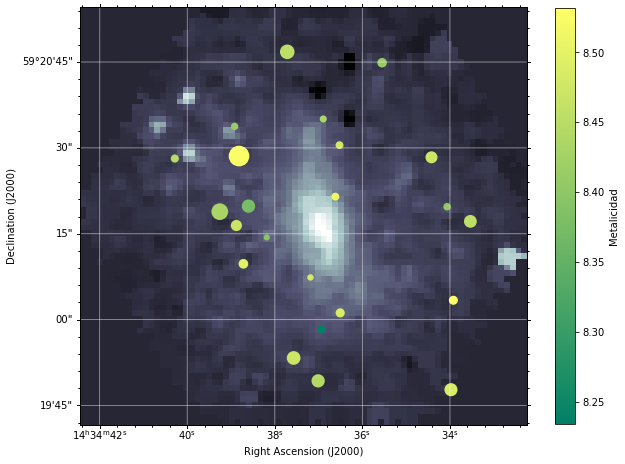

In [33]:
os.chdir(path+'\\UGC09391')    
os.getcwd()

f = plt.figure(figsize=(10,10)) 

gc = aplpy.FITSFigure('UGC09391.V500.rscube.fits',slices=[1407], figure=f)
gc.show_colorscale(cmap='bone')
gc.add_grid()
gc.grid.set_alpha(0.3)
gc.ticks.set_minor_frequency(5)
gc.axis_labels.set_xtext('Right Ascension (J2000)')
gc.axis_labels.set_ytext('Declination (J2000)')


## Posiciones representando metalicidad (por tamaño y color) 
raU9391, decU9391 = np.loadtxt(path+'\\UGC09391\cefeidasU09391_final.txt', unpack=True)
metU9391 = np.loadtxt(path+'\\UGC09391\met_UGC09391.txt', unpack=True)
errmetU9391 = np.loadtxt(path+'\\UGC09391\err_met_UGC09391.txt', unpack=True)

c = [(10**n/1e6-1.1**n-150) for n in metU9391]
s = [2e3*n for n in errmetU9391]
                                               
gc.show_markers(raU9391,decU9391, cmap = plt.get_cmap('summer'), 
                norm = colors.PowerNorm(gamma=0.4),
                c=c, s=s,facecolor='none', marker='o', linewidths=2.3)
f.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=metU9391.min(), vmax=metU9391.max()),
            cmap=plt.get_cmap('summer')), shrink =0.765, format='%.2f',
            label="Metalicidad")